# Решение нелинейных уравнений

## Постановка задачи
Требуется найти корни нелинейного уравнения
$$f(x) = 0 \space для \space x \in [a,b],$$
где f - непрерывная или более гладкая функция

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
def a_func(x):
    return x**3 + 8 * x - 5


def a_derivative(x):
    return 3 * x**2 + 8


def b_func(x):
    return 2 * x + math.cos(x) - 2


def b_derivative(x):
    return 2 - math.sin(x)


def c_func(x):
    return np.exp(-2 * x) - 2 * x + 1


def c_derivative(x):
    return -2 * np.exp(-2 * x) - 2

In [3]:
def half_solve(f, a = 0, b = 1, eps = 0.001):
    while True:
        x = (a + b) / 2
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x
        if (b - a) < eps:
            break
    return x

In [4]:
def newton_solve(f, fd, x = 1, eps=0.001):
    while True:
        xx = x - f(x) / fd(x)
        if abs(xx - x) >= eps:
            x = xx
        else:
            break
    return x

In [5]:
def iteration_solve(f, x=1, m=5, eps=0.001):
    while True:
        xx = x - f(x) / m
        if abs(xx - x) >= eps:
            x = xx
        else:
            break
    return x

In [6]:
def show_solve(
    f,
    fd,
    f1,
    label_f1,
    f2,
    label_f2,
    x,
    half_solve_x,
    newton_solve_x,
    iteration_solve_x,
    axis=[None, None, None, None],
):
    fsolve_x = fsolve(f, 1)[0]
    plt.scatter(
        half_solve_x,
        f(half_solve_x),
        label=f"Метод деления отрезка пополам = {half_solve_x}",
    )
    plt.scatter(
        newton_solve_x,
        f(newton_solve_x),
        label=f"Метод Ньютона = {newton_solve_x}",
    )
    plt.scatter(
        iteration_solve_x,
        f(iteration_solve_x),
        label=f"Метод простой итерации = {iteration_solve_x}",
    )
    plt.scatter(
        fsolve_x,
        f(fsolve_x),
        label=f"scipy.optimize.fsolve = {fsolve_x}",
    )
    plt.plot(x, f1, label=label_f1)
    plt.plot(x, f2, label=label_f2)
    plt.axis(axis)
    plt.legend()
    plt.show()

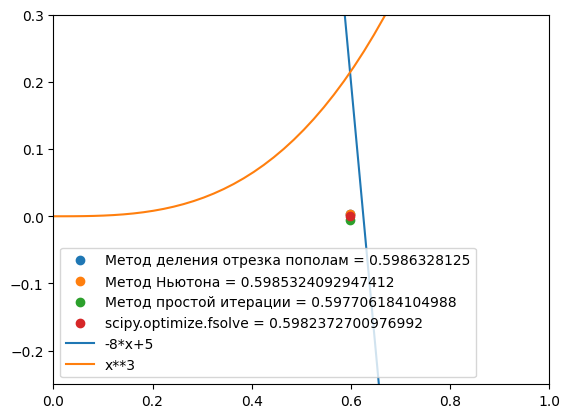

In [7]:
x = np.linspace(0, 2, 100)
show_solve(
    a_func,
    a_derivative,
    -8 * x + 5,
    "-8*x+5",
    x**3,
    "x**3",
    x,
    half_solve(a_func),
    newton_solve(a_func, a_derivative),
    iteration_solve(a_func),
    [0, 1, -0.25, 0.3],
)

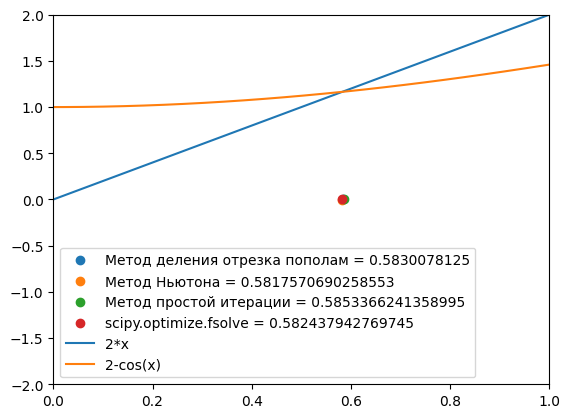

In [8]:
x = np.linspace(-2, 2, 100)
y = np.zeros(100)
for i in range(100):
    y[i] = 2 - np.cos(x[i])
show_solve(
    b_func,
    b_derivative,
    2 * x,
    "2*x",
    y,
    "2-cos(x)",
    x,
    half_solve(b_func),
    newton_solve(b_func, b_derivative),
    iteration_solve(b_func),
    [0, 1, -2, 2],
)

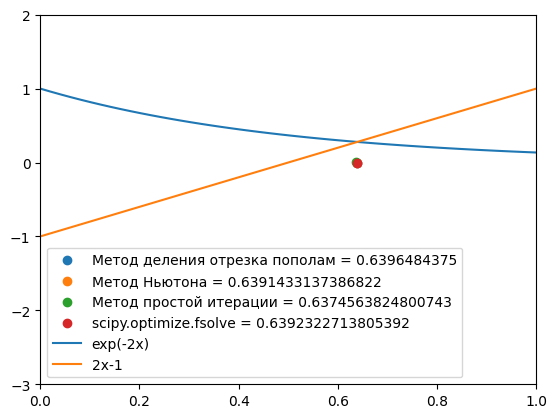

In [9]:
x = np.linspace(0, 2, 100)
y = np.zeros(100)
for i in range(100):
    y[i] = np.exp(-2 * x[i])
show_solve(
    c_func,
    c_derivative,
    y,
    "exp(-2x)",
    2 * x - 1,
    "2x-1",
    x,
    half_solve(c_func),
    newton_solve(c_func, c_derivative),
    iteration_solve(c_func, x=0.5, m=-5),
    [0, 1, -3, 2],
)